<a href="https://colab.research.google.com/github/AdeepKrishnaKeelar/ML-Trails/blob/master/CFTRI_Mango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications import imagenet_utils
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import itertools
import random
from IPython.display import Image
mobile = tf.keras.applications.mobilenet.MobileNet()

In [32]:
os.listdir('/content/drive/MyDrive/Data/CFTRI Dataset/CFTRI/train')

['cold_etheral',
 'hot_natural',
 'hot_calcium',
 'natural',
 'hot_etheral',
 'calcium_cold']

In [33]:
print(f'The total number of labels in this directory is {len(os.listdir("/content/drive/MyDrive/Data/CFTRI Dataset/CFTRI/train"))}')

The total number of labels in this directory is 6


In [34]:
train = ImageDataGenerator(rescale=1/255)

In [35]:
training_data = train.flow_from_directory(
    '/content/drive/MyDrive/Data/CFTRI Dataset/CFTRI/train',
    target_size=(224,224),
    batch_size=16,
    class_mode='categorical',
)

Found 206 images belonging to 6 classes.


In [36]:
training_data.class_indices

{'calcium_cold': 0,
 'cold_etheral': 1,
 'hot_calcium': 2,
 'hot_etheral': 3,
 'hot_natural': 4,
 'natural': 5}

In [24]:
#model = ResNet50(weights='imagenet')

In [27]:
#image_path = '/content/drive/MyDrive/Data/CFTRI Dataset/CFTRI/train/calcium_cold/'

#Next four lines are also comments
#img = image.load_img(image_path, target_size=(224,224))
#x = image.img_to_array(img)
#x = np.expand_dims(x,axis=0)
#x = preprocess_input(x)  


#images_list = []
#for root, dirs, files in os.walk(image_path):
#  for f in files:
#        if f[-4:] == '.jpg':
#            images_list.append(f)
#            #img = image.load_img(''.join(images_list), target_size=(224,224))
#            my_img = ''
#             my_img += '' + x
              
#            img = image.load_img(my_img, target_size=(224,224))
#            x = image.img_to_array(img)
#            x = np.expand_dims(x,axis=0)
#            x = preprocess_input(x) 

In [37]:
def prepare_image(file):
  img_path = '/content/drive/MyDrive/Data/CFTRI Dataset/CFTRI/train/calcium_cold/'
  img = image.load_img(img_path + file, target_size=(224,224))
  img_array = image.img_to_array(img)
  image_array_expanded_dims = np.expand_dims(img_array, axis=0)
  return tf.keras.applications.mobilenet.preprocess_input(image_array_expanded_dims)

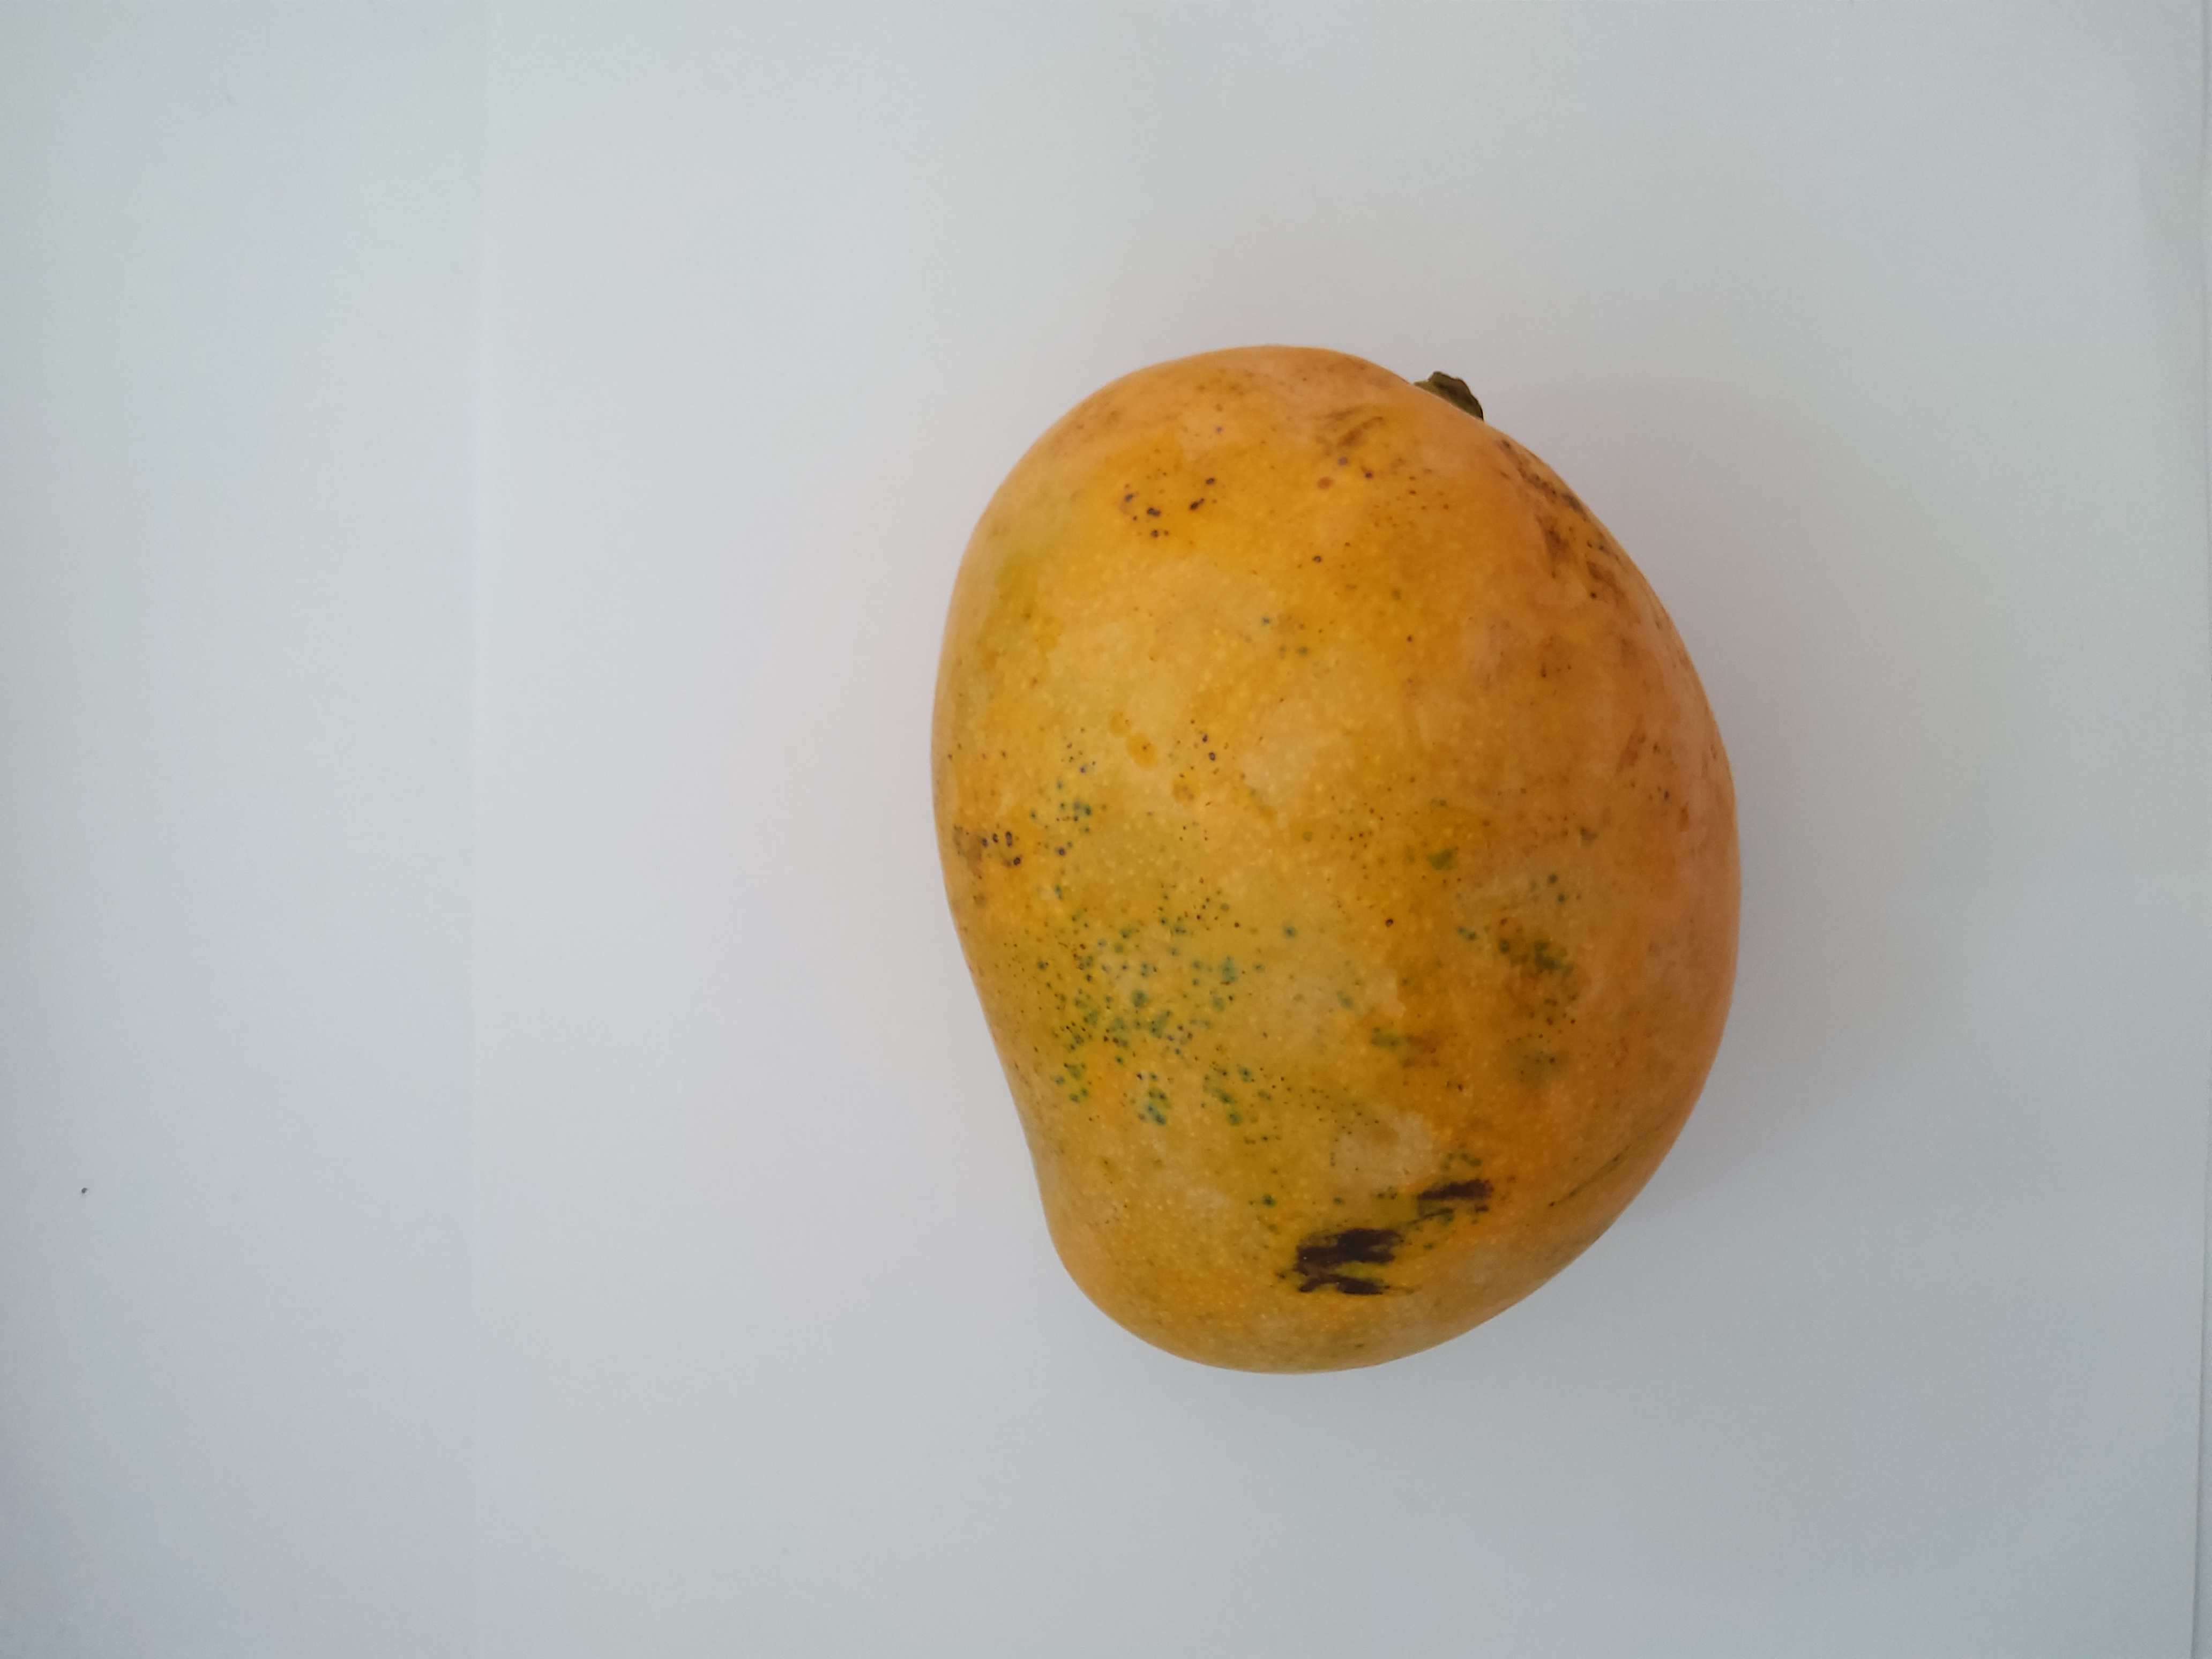

In [38]:
Image(filename='/content/drive/MyDrive/Data/CFTRI Dataset/CFTRI/train/calcium_cold/20201014_171030.jpg',width=224,height=224)

In [39]:
preprocessed_image = prepare_image('20201014_171030.jpg')
predictions = mobile.predict(preprocessed_image)

In [40]:
results = imagenet_utils.decode_predictions(predictions)

49152/35363 [=========================================] - 0s 0us/step


In [41]:
print(results)

[[('n07747607', 'orange', 0.588921), ('n07749582', 'lemon', 0.21267417), ('n07768694', 'pomegranate', 0.10581181), ('n07753592', 'banana', 0.030596366), ('n07716906', 'spaghetti_squash', 0.02595229)]]
